In [1]:
import pandas as pd
import xarray as xr
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ds=pd.read_csv('/work/uo1075/b381754/data/wam/Validate/SWAN/M4_SON_2011.csv',skiprows=[1,2])

In [3]:
mask = (ds['time'] >= '2011-09-01T00:00:00Z') & (ds['time'] <= '2011-11-30T12:00:00Z')

In [4]:
ds_sliced = ds.loc[mask]

In [5]:
ds_sliced

,longitude,latitude,time,WindDirection,WindSpeed,WaveHeight,WavePeriod
0,-9.999136,54.999967,2011-09-01T01:00:00Z,NaN,NaN,0.938,5.508
1,-9.999136,54.999967,2011-09-01T02:00:00Z,NaN,NaN,0.781,4.805
2,-9.999136,54.999967,2011-09-01T03:00:00Z,NaN,NaN,0.938,4.570
3,-9.999136,54.999967,2011-09-01T04:00:00Z,NaN,NaN,0.938,4.336
4,-9.999136,54.999967,2011-09-01T05:00:00Z,NaN,NaN,1.094,4.570
...,...,...,...,...,...,...,...
2086,-9.999136,54.999967,2011-11-30T08:00:00Z,216.0,24.477,6.250,8.906
2087,-9.999136,54.999967,2011-11-30T09:00:00Z,213.0,23.339,6.250,8.672
2088,-9.999136,54.999967,2011-11-30T10:00:00Z,208.0,27.466,5.938,8.789
2089,-9.999136,54.999967,2011-11-30T11:00:00Z,202.0,29.743,5.938,8.320


In [6]:

w1=pd.read_csv('/work/uo1075/b381754/data/wam/Validate/SWAN/m4_surro.csv')
#w1=pd.read_csv('/work/uo1075/b381754/data/wam/Validate/SWAN/Spatial_Analysis/m4_swan_SNA.csv')
w5=pd.read_csv('/work/uo1075/b381754/data/wam/Validate/SWAN/Spatial_Analysis/m4_swan_SNEA.csv')
irl=pd.read_csv('/work/uo1075/b381754/data/wam/Validate/SWAN/Spatial_Analysis/m4_swan_SIrel.csv')

In [7]:
m4h=ds_sliced['WaveHeight'].values
m4t=ds_sliced['time'].values

sh11=w1['Hs'].values
st11=w1['time'].values

sh55=w5['Hs'].values
st55=w5['time'].values

shii=irl['Hs'].values
stii=irl['time'].values

In [8]:
t4 = pd.to_datetime(m4t)
t11=pd.to_datetime(st11)
t55=pd.to_datetime(st55)
tii=pd.to_datetime(stii)

In [9]:
m4h_3H=m4h[0:1669:3]
t4_3H=t4[0:1669:3]

In [10]:
m4=m4h_3H#[30:562]

In [11]:
sh1=sh11[0:562]
ts1=t11[0:562]

sh5=sh55[0:562]
ts5=t55[0:562]

shi=shii[0:562]
tsi=tii[0:562]

Text(0.5, 1.0, 'Comparison of SWH distribution from SWAN driven by surrogate winds (S-NA, S-NEA, S-Ireland)\nand SWH distribution from M4 buoy')

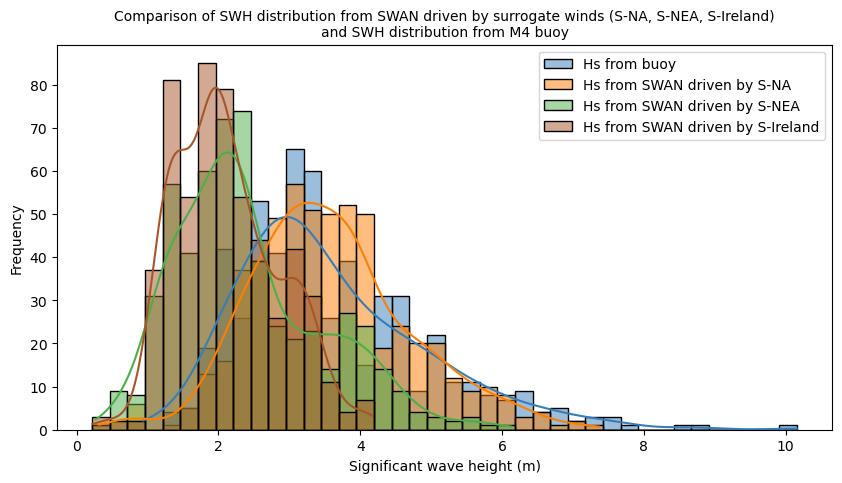

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Color cycle from Color Brewer
CB_color_cycle = ['#377eb8', '#ff7f00', '#4daf4a',
                  '#f781bf', '#a65628', '#984ea3',
                  '#999999', '#e41a1c', '#dede00']

# Set figure size
fig = plt.figure(figsize=(10, 5))

# Define the minimum and maximum values for the bins
vmin = min(m4h_3H.min(), (sh1).min(), (sh5).min(), (shi).min())
vmax = max(m4h_3H.max(), (sh1).max(), (sh5).max(), (shi).max())

# Number of bins for histograms
num_bins = 40

# Plot histograms with a consistent bin range and custom colors
sns.histplot(m4h_3H, kde=True, bins=num_bins, binrange=(vmin, vmax),
             label='Hs from buoy', color=CB_color_cycle[0])
sns.histplot(sh1 * 1.19, kde=True, bins=num_bins, binrange=(vmin, vmax),
             label='Hs from SWAN driven by S-NA', color=CB_color_cycle[1])
sns.histplot(sh5, kde=True, bins=num_bins, binrange=(vmin, vmax),
             label='Hs from SWAN driven by S-NEA', color=CB_color_cycle[2])
sns.histplot(shi, kde=True, bins=num_bins, binrange=(vmin, vmax),
             label='Hs from SWAN driven by S-Ireland', color=CB_color_cycle[4])

# Labels, legend, and title
plt.xlabel('Significant wave height (m)')
plt.ylabel('Frequency')
plt.legend()
plt.title(
    'Comparison of SWH distribution from SWAN driven by surrogate winds (S-NA, S-NEA, S-Ireland)\n'
    'and SWH distribution from M4 buoy',
    fontsize=10
)

#plt.savefig('/work/uo1075/b381754/data/wam/Validate/SWAN/Spatial_Analysis/spatila_analysis.png')
